In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [3]:
airbnb_df=pd.read_csv("listings.csv")

airbnb_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419.0,https://www.airbnb.com/rooms/1419,2.020000e+13,7/12/2022,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077.0,https://www.airbnb.com/rooms/8077,2.020000e+13,6/12/2022,city scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.04
2,26654.0,https://www.airbnb.com/rooms/26654,2.020000e+13,7/12/2022,city scrape,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,...,4.75,4.85,4.65,NaN,f,3,3,0,0,0.28


In [ ]:
print(airbnb_df['bedrooms'].isnull().sum())
print(airbnb_df['bathrooms_text'].isnull().sum())
print(airbnb_df['review_scores_rating'].isnull().sum())
print(airbnb_df['reviews_per_month'].isnull().sum())

980
6
4157
4157


Let's take a look at some variables that can affect customers choice

In [4]:
df = pd.DataFrame()
airbnb_df = airbnb_df.dropna(subset=['bedrooms'])
airbnb_df = airbnb_df.dropna(subset=['bathrooms_text'])
airbnb_df = airbnb_df.dropna(subset=['review_scores_rating'])
airbnb_df = airbnb_df.dropna(subset=['reviews_per_month'])

df['name'] = airbnb_df.apply(lambda x: x['name'], axis = 1)
df['price'] = airbnb_df.apply(lambda x: x['price'],axis = 1)
df['neighbourhood'] = airbnb_df.apply(lambda x: x['neighbourhood_cleansed'], axis = 1)
df['type'] = airbnb_df.apply(lambda x: x['property_type'], axis = 1)
df['bedrooms'] = airbnb_df.apply(lambda x: x['bedrooms'], axis = 1)  
df['bathrooms'] = airbnb_df.apply(lambda x: x['bathrooms_text'], axis = 1)
df['scores'] = airbnb_df.apply(lambda x: x['review_scores_rating'], axis = 1)
df['monthly_review'] = airbnb_df.apply(lambda x: x['reviews_per_month'], axis = 1)
display(df)

,name,price,neighbourhood,type,bedrooms,bathrooms,scores,monthly_review
0,Beautiful home in amazing area!,$469.00,Little Portugal,Entire home,5.0,3 baths,5.00,0.08
1,Downtown Harbourfront Private Room,$101.00,Waterfront Communities-The Island,Private room in rental unit,1.0,1.5 baths,4.84,1.04
2,World Class downtown @CN Tower Theatre MTCC ga...,$125.00,Waterfront Communities-The Island,Entire condo,1.0,1 bath,4.78,0.28
4,Calming Bedroom 2 - Beaches Toronto,$37.00,Woodbine Corridor,Private room in home,1.0,1 shared bath,5.00,0.18
6,Calming Bedroom 3 - Beaches Toronto,$37.00,Woodbine Corridor,Private room in home,1.0,1 shared bath,4.89,0.08
...,...,...,...,...,...,...,...,...
16575,Delux City Escape Penthhouse - The grand Lake ...,$229.00,Waterfront Communities-The Island,Entire rental unit,1.0,1 bath,5.00,1.00
16577,Cn tower views 1+ den,$166.00,Waterfront Communities-The Island,Entire rental unit,1.0,1 bath,4.50,2.00
16602,London,$61.00,Kingsview Village-The Westway,Private room in home,1.0,1.5 baths,5.00,1.00
16617,2Bdr Apt direct access to Metro,$186.00,Lansing-Westgate,Entire rental unit,2.0,2 baths,5.00,1.00


In [5]:
print(df['price'])

0        $469.00
1        $101.00
2        $125.00
4         $37.00
6         $37.00
          ...   
16575    $229.00
16577    $166.00
16602     $61.00
16617    $186.00
16644    $122.00
Name: price, Length: 11833, dtype: object


# **Discriptive Analysis**

The correlation we might need to analyze:
 
1.   frequency (top listing, neighbourhood, roomtype, price ranges, etc.)
2.   monthly review
4.   scores


Variables Frequency Distribution Tables

What are the top listing hosts in Great Toronto area?

In [35]:
top_host_init = pd.DataFrame({
    'Frequency': airbnb_df['host_id'].value_counts(),
    'Percent': airbnb_df['host_id'].value_counts(normalize=True) * 100
})
#top_host = top_host_init['Frequency'].head(10)

In [44]:
top_host = top_host_init.head(10)
top_host

,Frequency,Percent
785826.0,52,0.439449
269243315.0,44,0.371841
10202618.0,40,0.338038
846505.0,37,0.312685
135718015.0,33,0.278881
416677873.0,28,0.236626
301014754.0,28,0.236626
460443520.0,25,0.211274
146226441.0,24,0.202823
54422135.0,23,0.194372


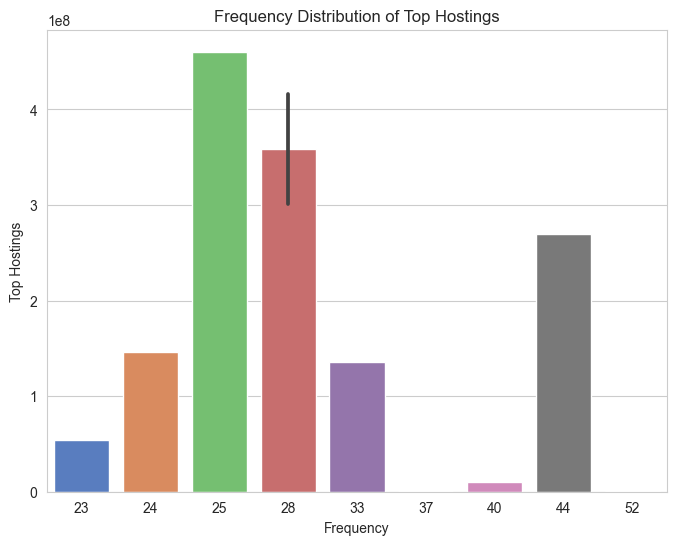

In [45]:

fig0, ax0 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=top_host.index, data=top_host, palette='muted')

# set the labels and title
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Top Hostings")
ax0.set_title("Frequency Distribution of Top Hostings")

# show the plot
plt.show()


Let's see what areas are the most popular in Great Toronto area

In [6]:
import matplotlib.pyplot as plt
freq_location = pd.DataFrame({'Frequency': df['neighbourhood'].value_counts().sort_values(),
                              'Percent': df['neighbourhood'].value_counts(normalize=True).sort_values() * 100})

print(freq_location)

                                   Frequency    Percent
Kingsway South                             5   0.042255
Rustic                                     6   0.050706
Edenbridge-Humber Valley                   9   0.076058
Morningside                               10   0.084509
Elms-Old Rexdale                          11   0.092960
...                                      ...        ...
Church-Yonge Corridor                    310   2.619792
Trinity-Bellwoods                        326   2.755007
Annex                                    366   3.093045
Niagara                                  463   3.912786
Waterfront Communities-The Island       2030  17.155413

[140 rows x 2 columns]


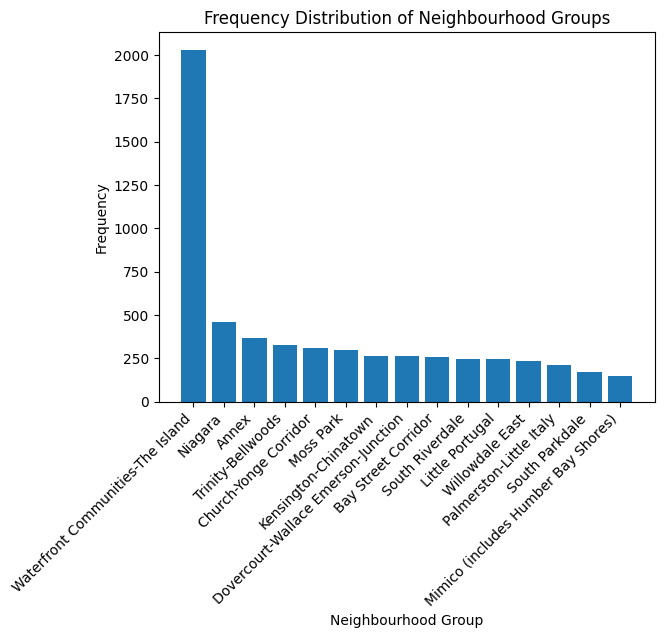

In [7]:
# sort freq_location in descending order by Frequency and select top 15 values
freq_location_sorted = freq_location.sort_values('Frequency', ascending=False)[:15]

#plot the frequency distribution
fig, ax = plt.subplots()

ax.bar(freq_location_sorted.index, freq_location_sorted['Frequency'], width=0.8, align='center')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Frequency')
# adjust the positions of the x-axis labels
plt.xticks(rotation=45, ha='right')

ax.set_title('Frequency Distribution of Neighbourhood Groups')
plt.show()

What kind of room type is more popular than others?

In [8]:
freq_type = pd.DataFrame({
    'Frequency': airbnb_df['room_type'].value_counts(),
    'Percent': airbnb_df['room_type'].value_counts(normalize=True) * 100
})

# sort by frequency in ascending order
freq_type = freq_type.sort_values('Frequency')

# display the result
print(freq_type)

                 Frequency    Percent
Hotel room               3   0.025353
Shared room             84   0.709879
Private room          3855  32.578382
Entire home/apt       7891  66.686386


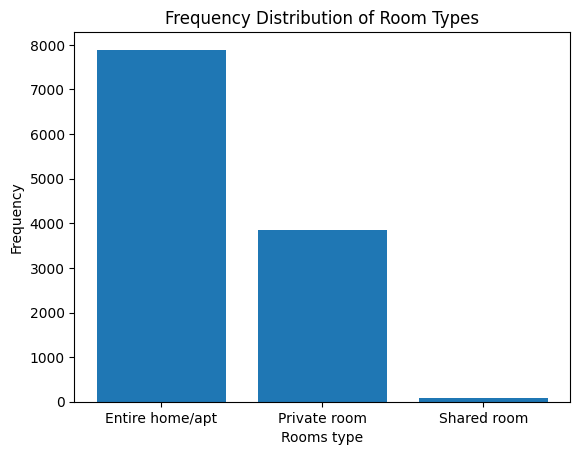

In [9]:
# sort frequency of room types in descending order by Frequency and select top 3 values
freq_type_sorted = freq_type.sort_values('Frequency', ascending=False)[:3]

#plot the frequency histogram distribution
fig1, ax1 = plt.subplots()

ax1.bar(freq_type_sorted.index, freq_type_sorted['Frequency'], width=0.8, align='center')
ax1.set_xlabel('Rooms type')
ax1.set_ylabel('Frequency')

ax1.set_title('Frequency Distribution of Room Types')
plt.show()

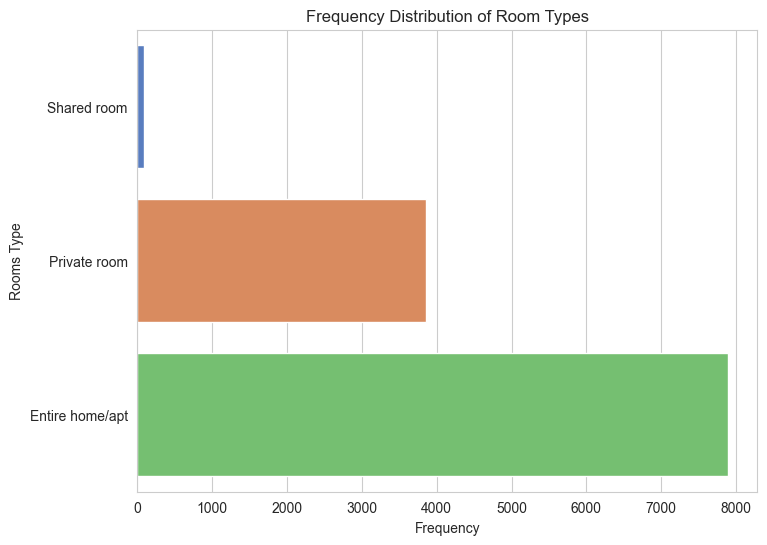

In [25]:
# create bar plot
fig1_1, ax1_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=freq_type_sorted.index, data=freq_type_sorted, palette='muted')

# set the labels and title
ax1_1.set_xlabel("Frequency")
ax1_1.set_ylabel("Rooms Type")
ax1_1.set_title("Frequency Distribution of Room Types")

# show the plot
plt.show()


We also should know what are the acceptable price for customers.

In [10]:
#change the type of price
print(airbnb_df['price'].dtype)

airbnb_df['price'] = airbnb_df['price'].astype(str)
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')

airbnb_df['price'] = airbnb_df['price'].astype(float)
print(airbnb_df['price'])

object
0        469.0
1        101.0
2        125.0
4         37.0
6         37.0
         ...  
16575    229.0
16577    166.0
16602     61.0
16617    186.0
16644    122.0
Name: price, Length: 11833, dtype: float64


/Users/leslie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [20]:
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
bin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

# Create a new column for price bin
airbnb_df['price_bin'] = pd.Series(dtype='object')

# Iterate through each price value and assign the appropriate bin label
for i, price in enumerate(airbnb_df['price']):
    for j, bin_edge in enumerate(bin_edges[:-1]):
        if price >= bin_edge and price < bin_edges[j+1]:
            airbnb_df.loc[i, 'price_bin'] = bin_labels[j]
            break

freq_price = pd.DataFrame({
    'Frequency': airbnb_df['price_bin'].value_counts(),
    'Percent': airbnb_df['price_bin'].value_counts(normalize=True) * 100
})

# sort by frequency in ascending order
freq_type = freq_price.sort_values('Frequency')
# Check the frequency distribution of price bins
display(freq_price)


,Frequency,Percent
50-100,3570,30.507606
100-150,2564,21.910784
150-200,1653,14.125790
0-50,1096,9.365920
200-250,985,8.417365
250-300,622,5.315331
300-350,377,3.221672
350-400,246,2.102205
400-450,147,1.256196
500-600,133,1.136558


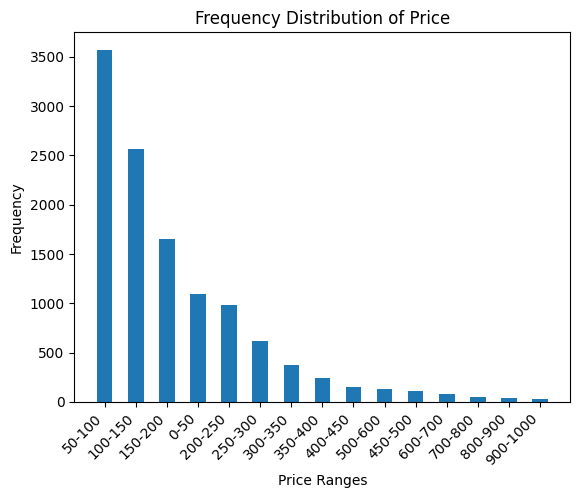

In [21]:
# sort frequency of price frequency in descending order by Frequency and select top 15 values
freq_price_sorted = freq_price.sort_values('Frequency', ascending=False)[:15]

#plot the frequency histogram distribution
fig2, ax2 = plt.subplots()

ax2.bar(freq_price_sorted.index, freq_price_sorted['Frequency'], width=0.5, align='center')
ax2.set_xlabel('Price Ranges')
ax2.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
ax2.set_title('Frequency Distribution of Price')
plt.show()

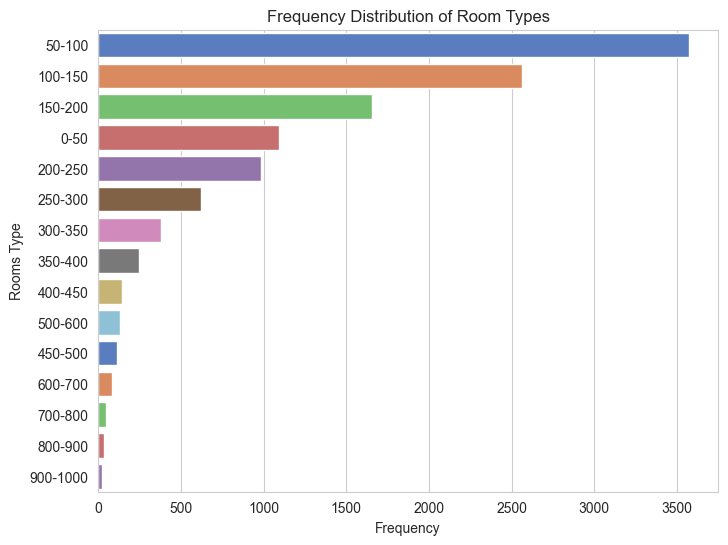

In [26]:
#create bar plot
fig2_1, ax2_1 = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_style("whitegrid")

# plot the bar graph
sns.barplot(x='Frequency', y=freq_price_sorted.index, data=freq_price_sorted, palette='muted')

# set the labels and title
ax2_1.set_xlabel("Frequency")
ax2_1.set_ylabel("Rooms Type")
ax2_1.set_title("Frequency Distribution of Room Types")

# show the plot
plt.show()
